In [107]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import Image as Image
import cv2

In [108]:
#RGB to hex function
def rgbToHex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
#print(rgbToHex([255, 217, 0])) #test

In [109]:
def plot_image_info(path, k):
    #image load
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # reshape the image to be a list of pixels
    resized_img_rgb = cv2.resize(img_rgb, (255, 255), interpolation=cv2.INTER_AREA) # to speed up the prozess make the picture small ex.64x64
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))
    
    # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
    
    # count labels
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    
    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgbToHex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

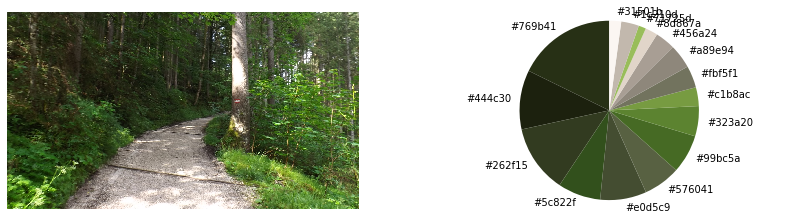

In [85]:
plot_image_info('Images/01.jpg',16)

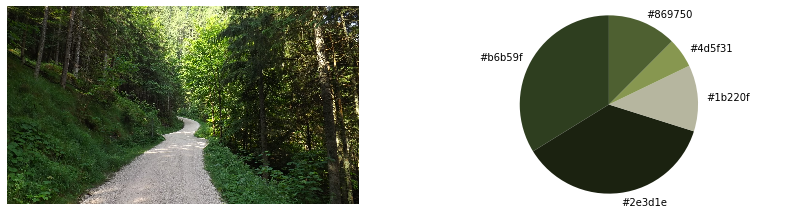

In [80]:
plot_image_info('Images/02.jpg',5)

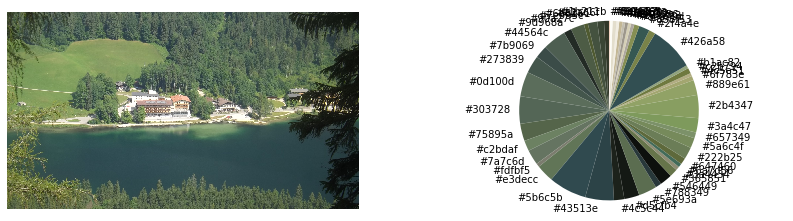

In [104]:
plot_image_info('Images/03.jpg',50)

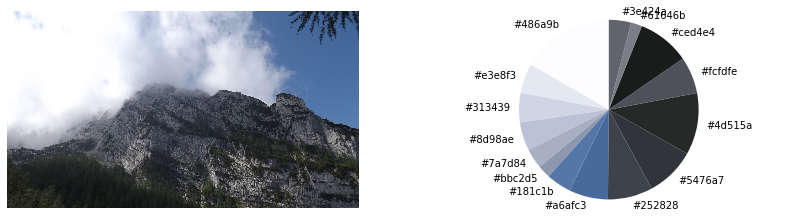

In [106]:
plot_image_info('Images/04.jpg',15)

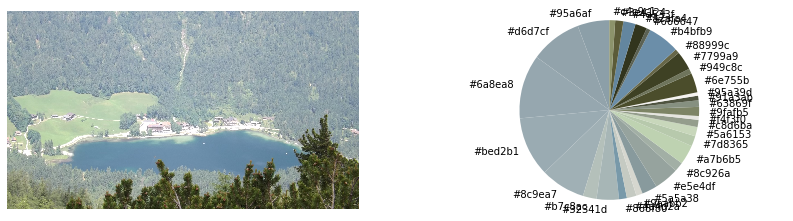

In [95]:
plot_image_info('Images/05.jpg',32)

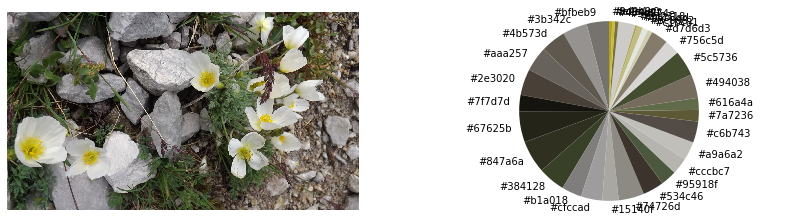

In [97]:
plot_image_info('Images/06.jpg',32)

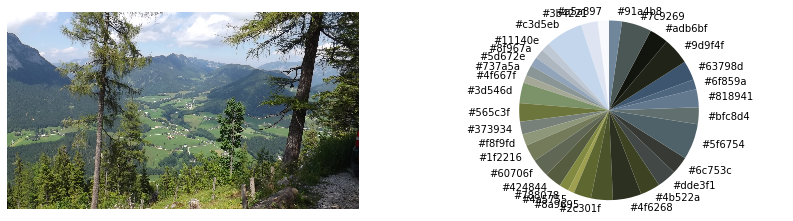

In [103]:
plot_image_info('Images/07.jpg',32)

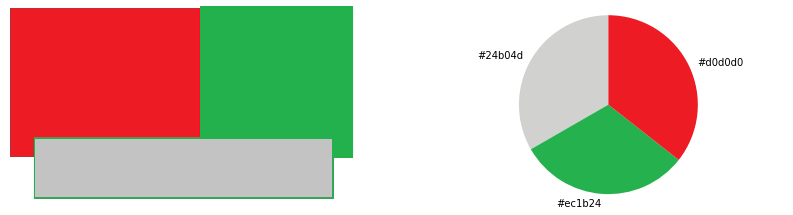

In [110]:
plot_image_info('Images/08.jpg',3)

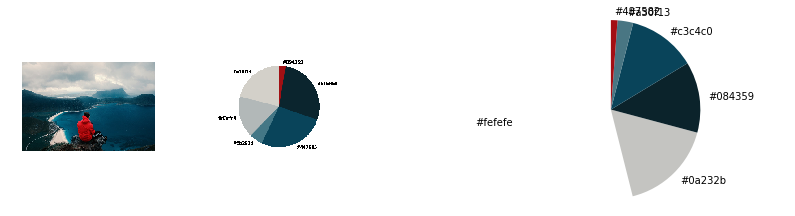

In [111]:
plot_image_info('Images/09.png',6)